# Advent of Code 2023, Day 10
[Day 10 Challenge](https://adventofcode.com/2023/day/10)


In [670]:
import aoc
import networkx as nx
%reload_ext autoreload

day = 10
sample = False
sample_number = 4

In [671]:
input_list = aoc.split_contents(aoc.read_input(f'Input/day_{day:02}{"_sample"+str(sample_number) if sample else ""}.txt'))

# Part 1

In [672]:
input_list

['J7F--7-|7FJ.FF|.FJ77.FJFL7FFF-J7F7-J-77F|-|7LL7.|FJ7F|JF|.FLF7-FF--7.-J.7-FF7F-77.LJFJ-FF.F|-F----77F77.JF|F|7F.|7-FJ-F777..F-7|77F7FFFF7FJ7',
 '|L7.LL.|7J.F-.|-|JJF7-F7.|-JJ.|LLL.|7|JF|7|F7-FF7-.FLJLJL-.||LF|JLFFJLJ-7-JL77-7FJ-F-J.FJ-.|FL---7L7-FJ..FF-|-J-L|-||.L77-7-J.L-FJFL|-7-FJJ.',
 '|.|FL7||F--JJ|-.JJ.J.LJ|7|J---J..L|--|F-|7F|FF-J|---J.F7J.F|7JL|F7JJ|.L-J|.7|F-JJ.FF7-J||--|J.|.F|FJ7|F-7-JJL-J7FL7F7FF.7JLLFFLJL--7|7JL|J.L',
 '|FF7.||FF-F|.LL7|.7L-7.F7JL7FL|7.LJJ.-|F777LF|F7|J-FF7JJ.F||F7-L.||J|..LFFF-L.L|7||L77.L-7JJ.|7-FJ|7F|7|||.FFF-7-|FJL-|7JF7F|..F|FL7-L7..F|.',
 'L7|7.L--L7F77|L|J-...-|.J7F||LL|.F7L-.L7||FF-J|LJF--J|J..J--||.F-7J.F|JFF7JLLJ.LF|J7JLJ-LJ7FF|F-JFJ-JLLJ-J--|J-|-FFJ7JLJ77LJ.J--77|||.|.L-7J',
 '|LF77L.|LLL-J7FJJ.|7F7L--FJJJ-FJ7|7.LFLJFFJL7FJ|FJF--J.|77|JL7-|-J-7L|LF.LJ-L-JFFJ7|J|J7|F-|-LL-7|7J||..||L7.FL7FF|FJ|.LJ||||.|FJL-FJFFF7FL.',
 'F7LL7.FL7|-L-FJ|F-J||F7|-7JJ-L7FJ.|FLLJ--|.||L--JFJF7J.FF7FF7J7.FJL7-|.L7LF7.JJ7|L-||L7|7L||FLF-JL-7-F77F|-F7--LJ-7J.LL-L7----JL

In [673]:
grid_height = len(input_list)
grid_width = len(input_list[0])

In [674]:
def get_neighbor(x,y,d):
    neighbor_dict = {'T':(1,0),'L':(0,1),'R':(2,1),'B':(1,2)}
    return x*2+neighbor_dict[d][0], y*2+neighbor_dict[d][1]

In [675]:
G = nx.Graph()

In [676]:
for x in range(grid_width*2+1):
    for y in range(grid_height*2+1):
        G.add_node((x,y))

In [677]:
# Add edges for all tiles that have a pipe that isn't an S (starting tile)
connection_dict = {
    'F': ('R','B'),
    '-': ('L','R'),
    '7': ('L','B'),
    '|': ('T','B'),
    'J': ('T','L'),
    'L': ('T','R')
}
edge_count = 0
for row in range(grid_height):
    for column in range(grid_width):
        pipe = input_list[row][column]
        if pipe != '.' and pipe != 'S':
            u = get_neighbor(column,row,connection_dict[pipe][0])
            v = get_neighbor(column,row,connection_dict[pipe][1])
            G.add_edge(u,v)
            edge_count+=1
            aoc.logger.info(f'Added {pipe} {u=} {v=} {column=} {row=} {edge_count=}')
        elif pipe == 'S':
            starting_tile = (column, row)
            look_directions = list()
            if column > 0:
                look_directions.append('L')
            if column < grid_width - 1:
                look_directions.append('R')
            if row > 0:
                look_directions.append('T')
            if row < grid_height - 1:
                look_directions.append('B')

INFO:AoC:Added J u=(1, 0) v=(0, 1) column=0 row=0 edge_count=1
INFO:AoC:Added 7 u=(2, 1) v=(3, 2) column=1 row=0 edge_count=2
INFO:AoC:Added F u=(6, 1) v=(5, 2) column=2 row=0 edge_count=3
INFO:AoC:Added - u=(6, 1) v=(8, 1) column=3 row=0 edge_count=4
INFO:AoC:Added - u=(8, 1) v=(10, 1) column=4 row=0 edge_count=5
INFO:AoC:Added 7 u=(10, 1) v=(11, 2) column=5 row=0 edge_count=6
INFO:AoC:Added - u=(12, 1) v=(14, 1) column=6 row=0 edge_count=7
INFO:AoC:Added | u=(15, 0) v=(15, 2) column=7 row=0 edge_count=8
INFO:AoC:Added 7 u=(16, 1) v=(17, 2) column=8 row=0 edge_count=9
INFO:AoC:Added F u=(20, 1) v=(19, 2) column=9 row=0 edge_count=10
INFO:AoC:Added J u=(21, 0) v=(20, 1) column=10 row=0 edge_count=11
INFO:AoC:Added F u=(26, 1) v=(25, 2) column=12 row=0 edge_count=12
INFO:AoC:Added F u=(28, 1) v=(27, 2) column=13 row=0 edge_count=13
INFO:AoC:Added | u=(29, 0) v=(29, 2) column=14 row=0 edge_count=14
INFO:AoC:Added F u=(34, 1) v=(33, 2) column=16 row=0 edge_count=15
INFO:AoC:Added J u=(35,

In [678]:
# Add the edge for the starting pipe, S
direction_dict = {'L': (-1,0), 'R': (1,0), 'T': (0,-1), 'B': (0,1)}
pipe_check_dict = {
    'T': ['7','|','F'],
    'B': ['J','|','L'],
    'L': ['L','-','F'],
    'R': ['J','-','7']
}
pipe_type_dict = {
    'RB': 'F',
    'LB': '7',
    'RT': 'L',
    'LT': 'J'
}
pipe_type_direction = ''
for direction in look_directions:
    look_at_tile = (starting_tile[0] + direction_dict[direction][0], starting_tile[1] + direction_dict[direction][1])
    tile_pipe = input_list[look_at_tile[1]][look_at_tile[0]] 
    if tile_pipe in pipe_check_dict[direction]:
        pipe_type_direction += direction

In [679]:
G.add_edge(get_neighbor(starting_tile[0], starting_tile[1], pipe_type_direction[0]),
           get_neighbor(starting_tile[0], starting_tile[1], pipe_type_direction[1]))

In [680]:
cycle = nx.find_cycle(G, get_neighbor(starting_tile[0], starting_tile[1], pipe_type_direction[1]) )

In [681]:
farthest_point = len(cycle) / 2

In [682]:
farthest_point

6768.0

# Part 2

In [683]:
# https://pypi.org/project/shapely/
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [684]:
poly_coords = [x[0] for x in cycle]
polygon = Polygon(poly_coords)

In [685]:
def grid_point_from_tile_coord(tile_x, tile_y):
    return tile_x*2+1, tile_y*2+1

In [686]:
tiles_enclosed_in_loop = 0
point_in_loop_list = list()
point_not_in_loop_list = list()
aoc.logger.setLevel(10)
for x in range(grid_width):
    for y in range(grid_height):
        all_points_in_loop = True
        for n in 'TBLR':
            point = Point(get_neighbor(x,y,n))
            point_in_loop = polygon.contains(point)
            if not point_in_loop:
                all_points_in_loop = False
        if all_points_in_loop:
            tiles_enclosed_in_loop += 1
            point_in_loop_list.append((x,y))
        else:
            point_not_in_loop_list.append((x,y))

In [687]:
tiles_enclosed_in_loop

351

In [688]:
point_in_loop_list

[(36, 42),
 (36, 59),
 (36, 64),
 (36, 95),
 (36, 98),
 (37, 95),
 (37, 96),
 (38, 56),
 (38, 84),
 (39, 42),
 (39, 55),
 (40, 59),
 (40, 93),
 (41, 99),
 (42, 36),
 (42, 49),
 (42, 73),
 (42, 98),
 (43, 58),
 (43, 61),
 (43, 76),
 (43, 102),
 (44, 57),
 (44, 58),
 (45, 73),
 (46, 100),
 (47, 57),
 (49, 48),
 (49, 58),
 (49, 94),
 (51, 82),
 (51, 90),
 (52, 60),
 (52, 94),
 (53, 72),
 (53, 87),
 (53, 102),
 (54, 39),
 (54, 78),
 (54, 88),
 (55, 37),
 (55, 99),
 (56, 47),
 (56, 57),
 (56, 71),
 (57, 95),
 (58, 36),
 (58, 52),
 (59, 41),
 (59, 59),
 (59, 77),
 (60, 49),
 (60, 85),
 (61, 54),
 (61, 55),
 (61, 58),
 (61, 74),
 (61, 78),
 (61, 79),
 (62, 72),
 (62, 73),
 (62, 74),
 (62, 75),
 (62, 76),
 (62, 77),
 (62, 78),
 (62, 79),
 (63, 62),
 (63, 67),
 (63, 68),
 (63, 69),
 (63, 72),
 (63, 73),
 (63, 74),
 (63, 75),
 (63, 76),
 (63, 77),
 (63, 78),
 (63, 79),
 (63, 90),
 (64, 66),
 (64, 67),
 (64, 68),
 (64, 69),
 (64, 70),
 (64, 71),
 (64, 72),
 (64, 73),
 (64, 74),
 (64, 75),
 (64, 7

In [689]:
point_not_in_loop_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),

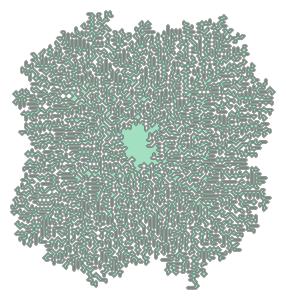

In [690]:
polygon